# Project: Handwritten Digit Recognition on MNIST dataset

## Table of content

1. [Importing Libraries](#section-one)
2. [Fetching Dataset](#section-two)
3. [Visualize Examples](#section-three)
4. [Data Preparation](#section-four)
5. [Model: Fully Connected Neural Network](#section-five)
6. [Train](#section-six)
7. [Evaluate](#section-seven)
8. [Confusion Matrix](#section-eight)

<a id="section-one"></a>
## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

np.random.seed(0)

<a id="section-two"></a>
## 2. Fetching Dataset

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
# Let's have a look at the number of rows and columns 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<a id="section-three"></a>
## 3. Visualize Examples

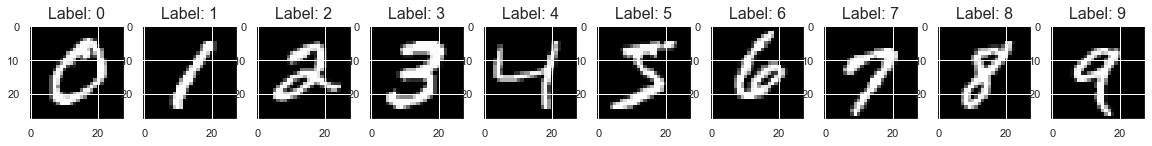

In [4]:
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize = (20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

<a id="section-four"></a>
## 4. Data Preparation

In [5]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# One-Hot Encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
# Normalize Data

x_train = x_train / 255.0 
x_test = x_test / 255.0

In [9]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)

(60000, 784)


<a id="section-five"></a>
## 5. Model: Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<a id="section-six"></a>
## 6. Train

In [11]:
model.fit(x = x_train, y = y_train, batch_size = 512, epochs = 10)

Epoch 1/10
118/118 [==============================] - 2s 3ms/step - loss: 0.5956 - accuracy: 0.8269
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 0.9352
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9535
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9619
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9686
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9742
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9778
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9830
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9849

<a id="section-seven"></a>
## 7. Evaluate

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}, \nTess Accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9768
Test Loss: 0.07733874022960663, 
Tess Accuracy: 0.9768000245094299


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[7.76382990e-07 1.08109089e-05 2.62106896e-05 ... 9.99922633e-01
  5.47976072e-07 3.46942761e-06]
 [1.24912091e-07 6.82776226e-05 9.99861717e-01 ... 1.10025525e-07
  3.16682599e-06 5.87372997e-11]
 [1.14635841e-05 9.98900056e-01 3.34358803e-04 ... 3.08657123e-04
  2.31037498e-04 2.64099549e-06]
 ...
 [8.28329960e-10 8.72918904e-10 9.48539025e-10 ... 1.27797392e-07
  3.76464264e-08 3.56292958e-06]
 [4.77220707e-09 8.51505200e-10 7.97427879e-13 ... 5.88384133e-11
  3.51794915e-05 8.00168909e-09]
 [2.35741041e-07 1.69926434e-10 1.96859329e-09 ... 3.16966245e-11
  6.62921185e-09 1.15247374e-10]]
[7 2 1 ... 4 5 6]


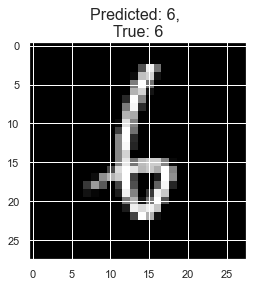

In [14]:
# Single Example

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f'Predicted: {y_sample_pred_class}, \nTrue: {y_sample_true}', fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

<a id="section-eight"></a>
## 8. Confusion Matrix

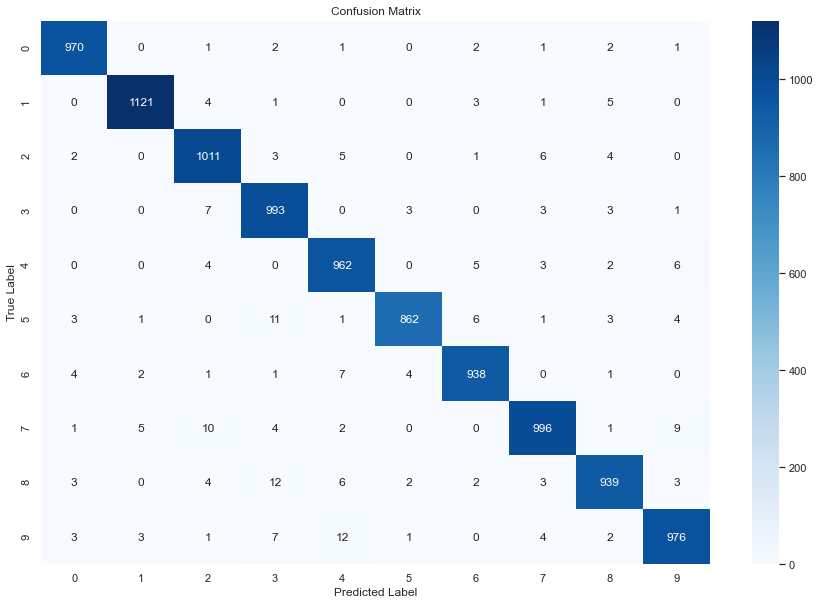

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');